# Airline Passenger Satisfaction

### Problem Statement

In the competitive airline industry, understanding customer satisfaction is essential for improving service quality and retaining loyal passengers. This project aims to develop a machine learning model that predicts whether a customer is "Satisfied" or "Neutral/Unhappy" based on various factors including demographic details, travel characteristics, and service-related ratings such as booking ease, inflight service, cleanliness, entertainment, and more. By identifying the key drivers of satisfaction, airlines can take proactive steps to enhance passenger experiences, optimize operations, and make informed, data-driven decisions to improve overall customer engagement

### Business Goal:
1. Improve overall customer experience by identifying pain points.
2. Predict customer satisfaction to proactively address service gaps.
3. Segment customers based on their likelihood of satisfaction for targeted service improvements.

### Data Dictionary

1. ID - Unique passenger identifier
2. Gender - Gender of the passenger (Female/Male)
3. Age - Age of the passenger.
4. Customer Type - Type of airline customer (First-time/Returning)
5. Type of Travel - Purpose of the flight (Business/Personal)
6. Class - Travel class in the airplane for the passenger seat
7. Flight Distance - Flight distance in miles
8. Departure Delay - Flight departure delay in minutes
9. Arrival Delay - Flight arrival delay in minutes
10. Departure and Arrival Time Convenience - Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest) - 0 means "not applicable"
11. Ease of Online Booking - Satisfaction level with the online booking experience from 1 (lowest) to 5 (highest) - 0 means "not applicable"
12. Check-in Service - Satisfaction level with the check-in service from 1 (lowest) to 5 (highest) - 0 means "not applicable"
13. Online Boarding - Satisfaction level with the online boarding experience from 1 (lowest) to 5 (highest) - 0 means "not applicable"
14. Gate Location - Satisfaction level with the gate location in the airport from 1 (lowest) to 5 (highest) - 0 means "not applicable"15. On-board Service - Satisfaction level with the on-boarding service in the airport from 1 (lowest) to 5 (highest) - 0 means "not applicable"
16. Seat Comfort - Satisfaction level with the comfort of the airplane seat from 1 (lowest) to 5 (highest) - 0 means "not applicable"
17. Leg Room Service - Satisfaction level with the leg room of the airplane seat from 1 (lowest) to 5 (highest) - 0 means "not applicable"
18. Cleanliness - Satisfaction level with the cleanliness of the airplane from 1 (lowest) to 5 (highest) - 0 means "not applicable"
19. Food and Drink - Satisfaction level with the food and drinks on the airplane from 1 (lowest) to 5 (highest) - 0 means "not applicable"
20. In-flight Service - Satisfaction level with the in-flight service from 1 (lowest) to 5 (highest) - 0 means "not applicable"
21. In-flight Wifi Service - Satisfaction level with the in-flight Wifi service from 1 (lowest) to 5 (highest) - 0 means "not applicable"
22. In-flight Entertainment - Satisfaction level with the in-flight entertainment from 1 (lowest) to 5 (highest) - 0 means "not applicable"
23. Baggage Handling - Satisfaction level with the baggage handling from the airline from 1 (lowest) to 5 (highest) - 0 means "not applicable“
24. Overall Satisfaction - Overall satisfaction level with the airline (Satisfied/Neutral or unsatisfied) –Target column


### Importing the libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import re

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [25]:
data = pd.read_csv('data.csv')
data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,4,4,2,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,5,3,4,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,4,2,1,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,3,4,1,4,4,5,3,3,4,5,3,5,Satisfied


### Exploratory Data Analysis

In [27]:
print(f'The following airline passenger data has {data.shape[0]} rows and {data.shape[1]} columns')

The following airline passenger data has 129880 rows and 24 columns


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  object 
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [39]:
# Unique values in each column

for col in data.columns:
    print('There are {} unique values in {} column'.format(data[col].nunique(),col))

There are 129880 unique values in ID column
There are 2 unique values in Gender column
There are 75 unique values in Age column
There are 2 unique values in Customer Type column
There are 2 unique values in Type of Travel column
There are 3 unique values in Class column
There are 6848 unique values in Flight Distance column
There are 466 unique values in Departure Delay column
There are 472 unique values in Arrival Delay column
There are 6 unique values in Departure and Arrival Time Convenience column
There are 6 unique values in Ease of Online Booking column
There are 6 unique values in Check-in Service column
There are 6 unique values in Online Boarding column
There are 6 unique values in Gate Location column
There are 6 unique values in On-board Service column
There are 6 unique values in Seat Comfort column
There are 6 unique values in Leg Room Service column
There are 6 unique values in Cleanliness column
There are 6 unique values in Food and Drink column
There are 6 unique values

In [41]:
# Checking for null values

for col in data.columns:
    print('There are {}% null values in {} column'.format(np.round(data[col].isnull().mean(),4),col))

There are 0.0% null values in ID column
There are 0.0% null values in Gender column
There are 0.0% null values in Age column
There are 0.0% null values in Customer Type column
There are 0.0% null values in Type of Travel column
There are 0.0% null values in Class column
There are 0.0% null values in Flight Distance column
There are 0.0% null values in Departure Delay column
There are 0.003% null values in Arrival Delay column
There are 0.0% null values in Departure and Arrival Time Convenience column
There are 0.0% null values in Ease of Online Booking column
There are 0.0% null values in Check-in Service column
There are 0.0% null values in Online Boarding column
There are 0.0% null values in Gate Location column
There are 0.0% null values in On-board Service column
There are 0.0% null values in Seat Comfort column
There are 0.0% null values in Leg Room Service column
There are 0.0% null values in Cleanliness column
There are 0.0% null values in Food and Drink column
There are 0.0% nu

##### Arrival delay has some null values

In [45]:
# Segregation different types of columns

numerical_columns = []
ordinal_categorical_columns = []
nominal_categorical_columns = []
for col in data.columns:
    if data[col].dtypes!='O' and data[col].nunique()>6:
        numerical_columns.append(col)
    elif data[col].dtypes!='O':
        ordinal_categorical_columns.append(col)
    else:
        nominal_categorical_columns.append(col)

print('The numerical columns are :\n\n{}'.format(', '.join(numerical_columns)))
print('-'*30)
print('-'*30)
print('-'*30)
print('The ordinal categorical columns are :\n\n{}'.format(', '.join(ordinal_categorical_columns)))
print('-'*30)
print('-'*30)
print('-'*30)
print('The nominal categorical columns are:\n\n{}'.format(', '.join(nominal_categorical_columns)))

The numerical columns are :

ID, Age, Departure Delay, Arrival Delay
------------------------------
------------------------------
------------------------------
The ordinal categorical columns are :

Departure and Arrival Time Convenience, Ease of Online Booking, Check-in Service, Online Boarding, Gate Location, On-board Service, Seat Comfort, Leg Room Service, Cleanliness, Food and Drink, In-flight Service, In-flight Wifi Service, In-flight Entertainment, Baggage Handling
------------------------------
------------------------------
------------------------------
The nominal categorical columns are:

Gender, Customer Type, Type of Travel, Class, Flight Distance, Satisfaction


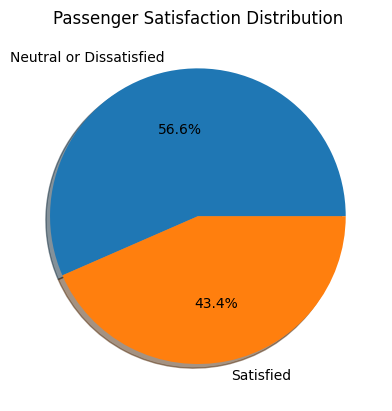

In [47]:
# Target column distribution
counts = data['Satisfaction'].value_counts()
plt.pie(x = counts,labels = counts.index,shadow=True,autopct = '%1.1f%%')
plt.title('Passenger Satisfaction Distribution')
plt.show()

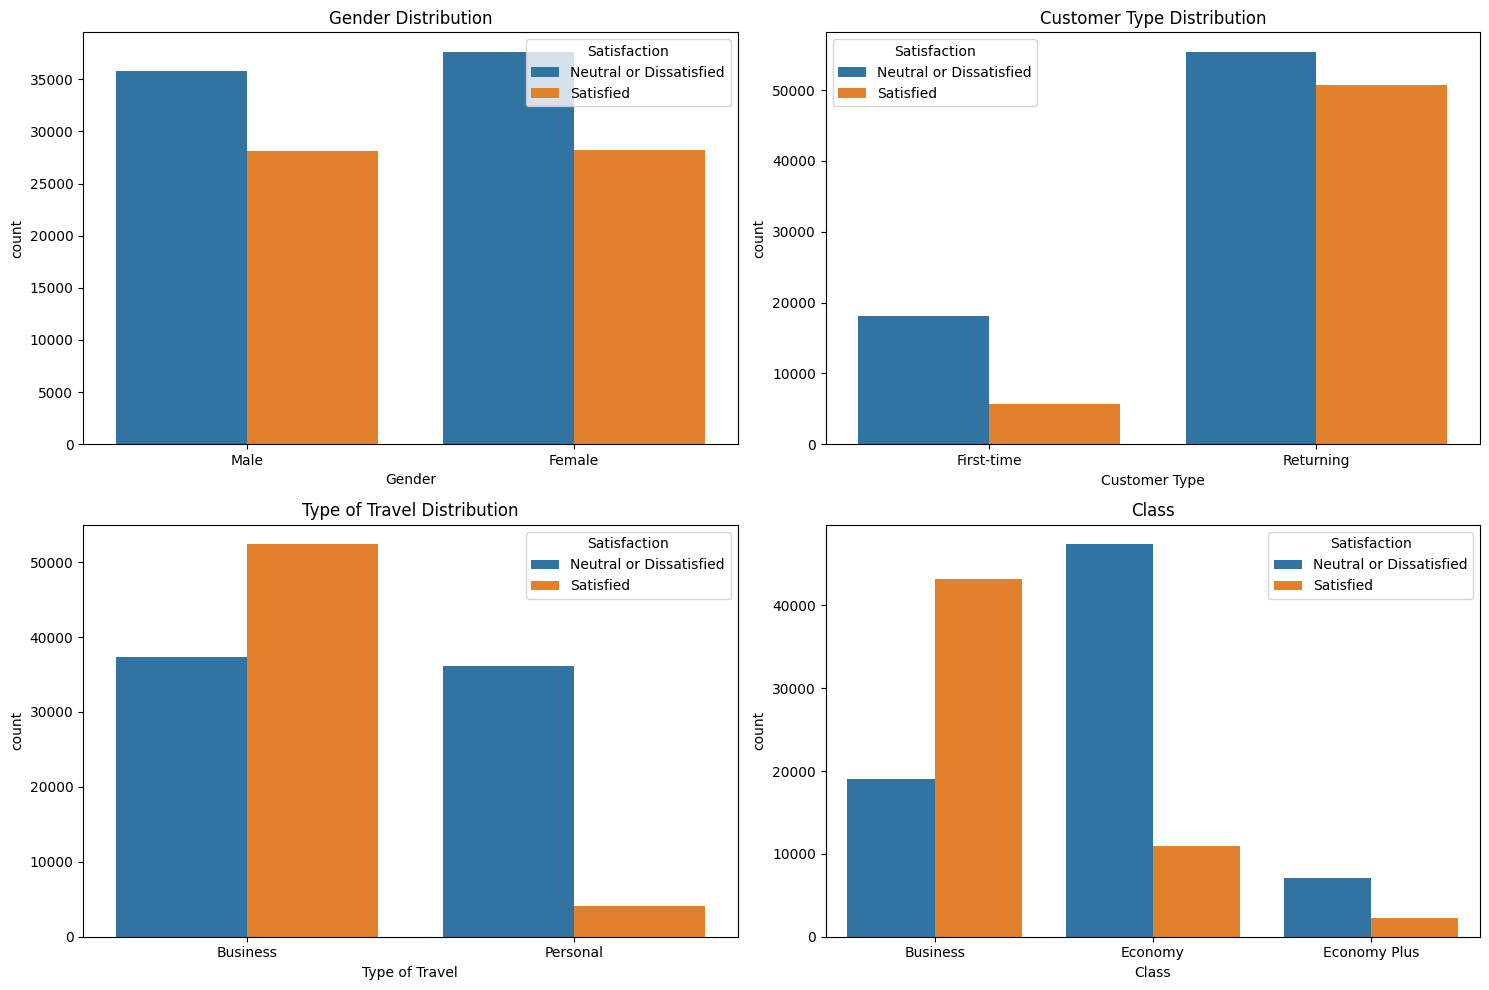

In [51]:
# Relation of target column with nominal categorical variables

fig,ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(data = data,x = 'Gender',hue = 'Satisfaction',ax=ax[0][0])
ax[0][0].set_title('Gender Distribution')
sns.countplot(data = data,x = 'Customer Type',hue = 'Satisfaction',ax = ax[0][1])
ax[0][1].set_title('Customer Type Distribution')
sns.countplot(data = data,x = 'Type of Travel',hue = 'Satisfaction',ax = ax[1][0])
ax[1][0].set_title('Type of Travel Distribution')
sns.countplot(data = data,x = 'Class',hue = 'Satisfaction',ax = ax[1][1])
ax[1][1].set_title('Class')
plt.tight_layout()
plt.show()

##### Observations

1. Gender doesn't have a significant impact on customer satisfaction.
2. Returning passengers have a much higher proportion of satisfied customers.
3. In contrast to 'Personal' type which had majority of unsatisfied customers, 'Business' type travelers had the majority of satisfied customers.
4. 'Business' class gave much more satisfying experience to customers compared to 'Economy' and 'Economy Plus'.

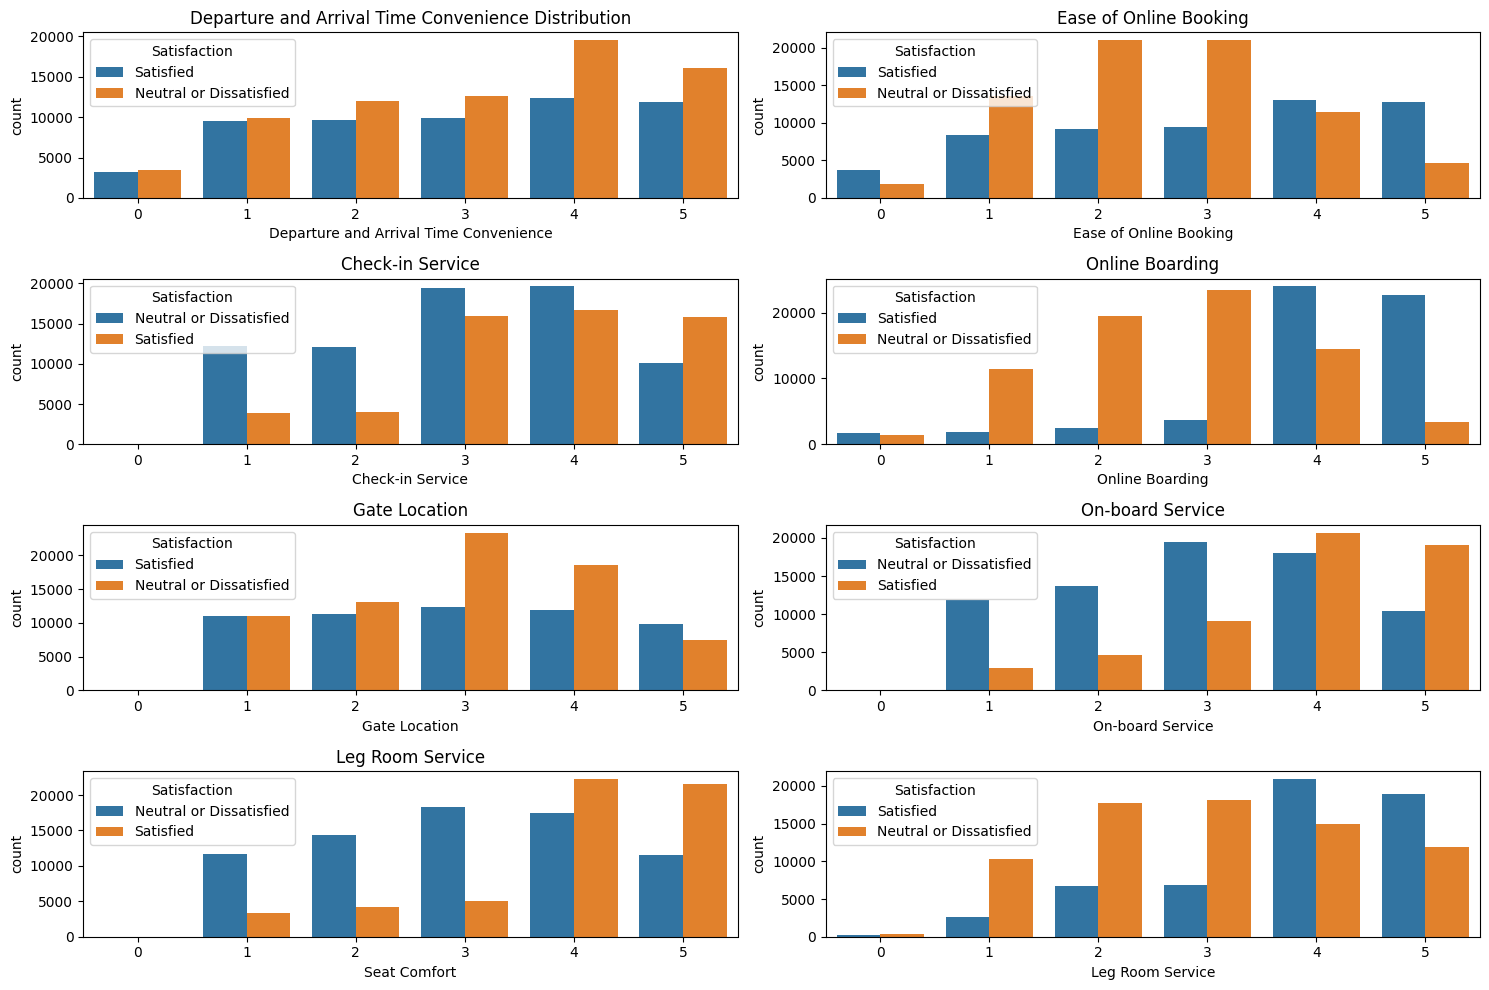

In [56]:
# Relation of target columns with ordinal categorical variables

fig,ax = plt.subplots(4,2,figsize=(15,10))
sns.countplot(data = data,x = 'Departure and Arrival Time Convenience',hue = 'Satisfaction',ax = ax[0][0])
ax[0][0].set_title('Departure and Arrival Time Convenience Distribution')
sns.countplot(data = data,x = 'Ease of Online Booking',hue = 'Satisfaction',ax = ax[0][1])
ax[0][1].set_title('Ease of Online Booking')
sns.countplot(data = data,x = 'Check-in Service',hue = 'Satisfaction',ax = ax[1][0])
ax[1][0].set_title('Check-in Service')
sns.countplot(data = data,x = 'Online Boarding',hue = 'Satisfaction',ax = ax[1][1])
ax[1][1].set_title('Online Boarding')
sns.countplot(data = data,x = 'Gate Location',hue = 'Satisfaction',ax = ax[2][0])
ax[2][0].set_title('Gate Location')
sns.countplot(data = data,x = 'On-board Service',hue = 'Satisfaction',ax = ax[2][1])
ax[2][1].set_title('On-board Service')
sns.countplot(data = data,x = 'Seat Comfort',hue = 'Satisfaction',ax = ax[3][0])
ax[3][0].set_title('Seat Comfort')
sns.countplot(data = data,x = 'Leg Room Service',hue = 'Satisfaction',ax = ax[3][1])
ax[3][0].set_title('Leg Room Service')
plt.tight_layout()
plt.show()

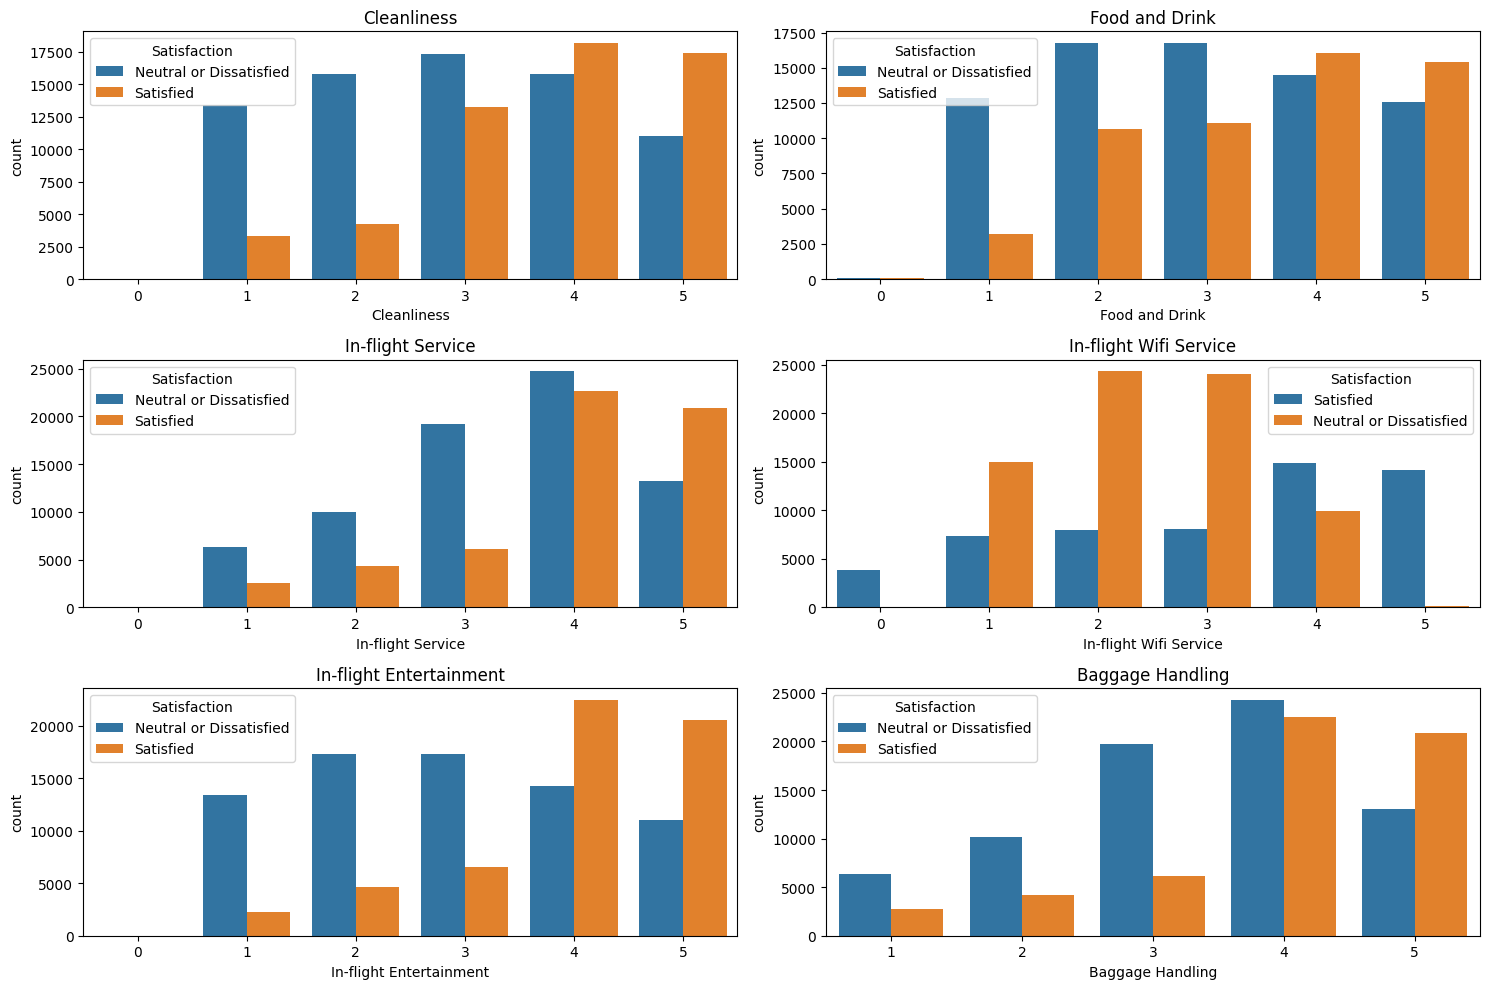

In [58]:
fig,ax = plt.subplots(3,2,figsize=(15,10))
sns.countplot(data = data,x = 'Cleanliness',hue = 'Satisfaction',ax = ax[0][0])
ax[0][0].set_title('Cleanliness')
sns.countplot(data = data,x = 'Food and Drink',hue = 'Satisfaction',ax = ax[0][1])
ax[0][1].set_title('Food and Drink')
sns.countplot(data = data,x = 'In-flight Service',hue = 'Satisfaction',ax = ax[1][0])
ax[1][0].set_title('In-flight Service')
sns.countplot(data = data,x = 'In-flight Wifi Service',hue = 'Satisfaction',ax = ax[1][1])
ax[1][1].set_title('In-flight Wifi Service')
sns.countplot(data = data,x = 'In-flight Entertainment',hue = 'Satisfaction',ax = ax[2][0])
ax[2][0].set_title('In-flight Entertainment')
sns.countplot(data = data,x = 'Baggage Handling',hue = 'Satisfaction',ax = ax[2][1])
ax[2][1].set_title('Baggage Handling')
plt.tight_layout()
plt.show()

##### Obsevations:
Except 'Departure and Arrival Time Convenience', in every other feature higher ratings have more satisfied customers than unsatisfied.

##### The numerical columns are having values in string format

In [70]:
# Removing currency signs from the strings

data['Flight Distance'] = data['Flight Distance'].apply(lambda x: re.sub('[^\d]','',x) if isinstance(x,str) else x)

In [72]:
# Changing the data type of Flight Distance column

data['Flight Distance'] = data['Flight Distance'].astype('int64')

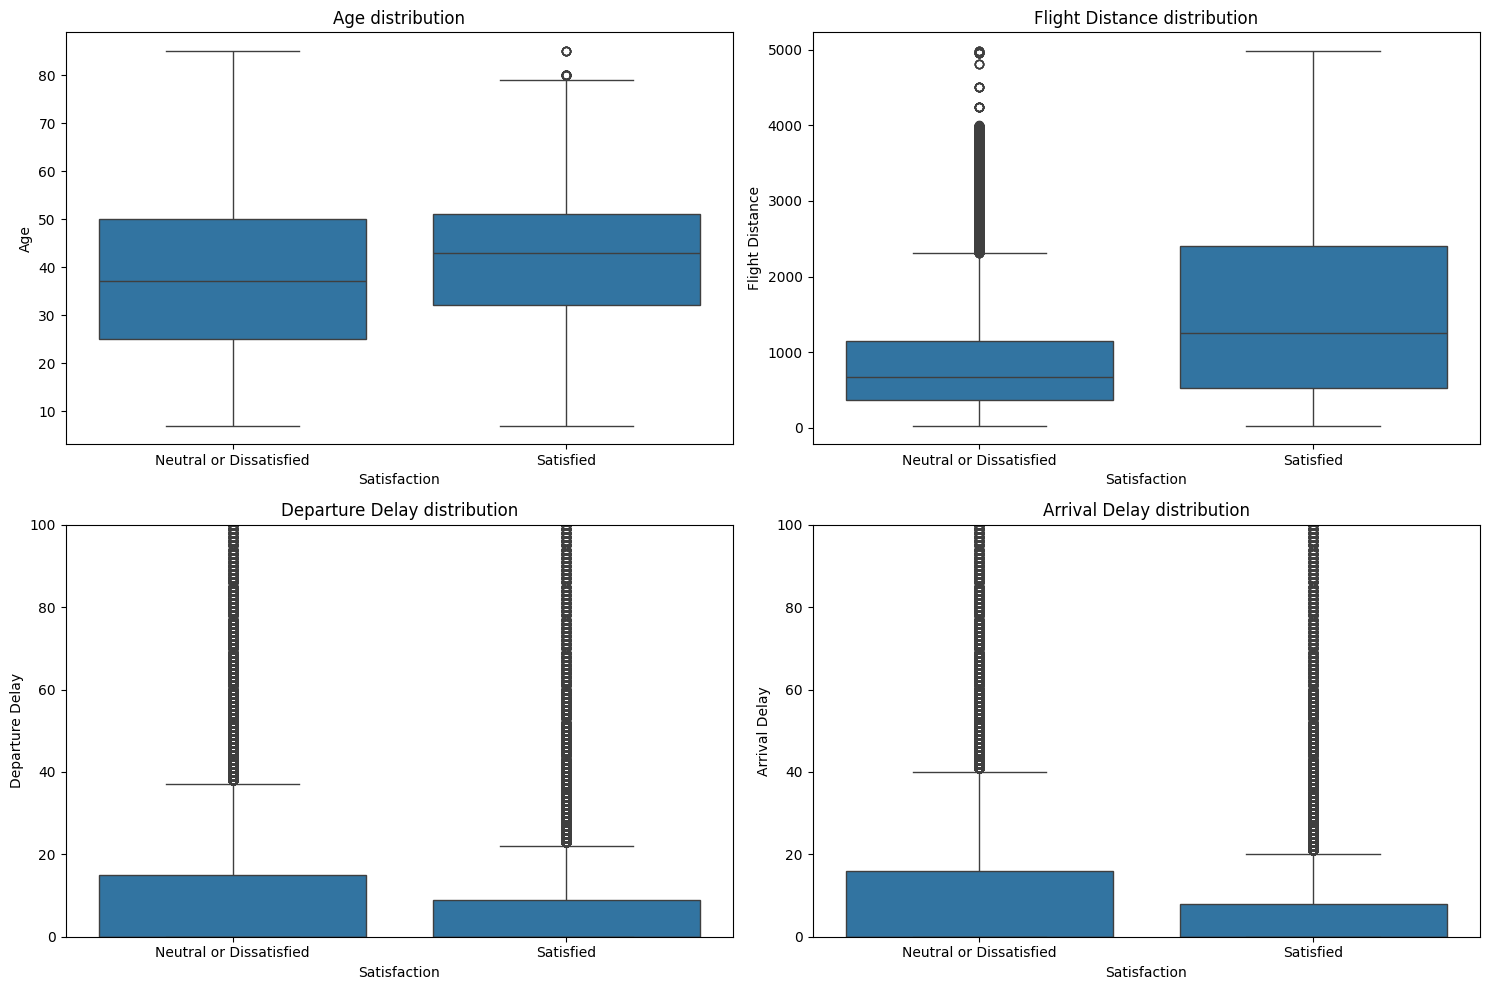

In [74]:
# Relation of target columns with numerical variables

fig,ax = plt.subplots(2,2,figsize=(15,10))
sns.boxplot(data = data,x = 'Satisfaction', y = 'Age',ax = ax[0][0])
ax[0][0].set_title('Age distribution')
sns.boxplot(data = data,x = 'Satisfaction',y = 'Flight Distance',ax = ax[0][1])
ax[0][1].set_title('Flight Distance distribution')
sns.boxplot(data = data,x = 'Satisfaction',y = 'Departure Delay',ax = ax[1][0])
ax[1][0].set_title('Departure Delay distribution')
ax[1][0].set_ylim(0, 100)
sns.boxplot(data = data,x = 'Satisfaction',y = 'Arrival Delay',ax = ax[1][1])
ax[1][1].set_title('Arrival Delay distribution')
ax[1][1].set_ylim(0, 100)
plt.tight_layout()
plt.show()

##### Observations:
1. People with more age tend to be more satisfied.
2. Longer Flight Distance results in more customer satisfaction.
3. Decrease in Departure and Arrival Delays increases customer satisfaction.

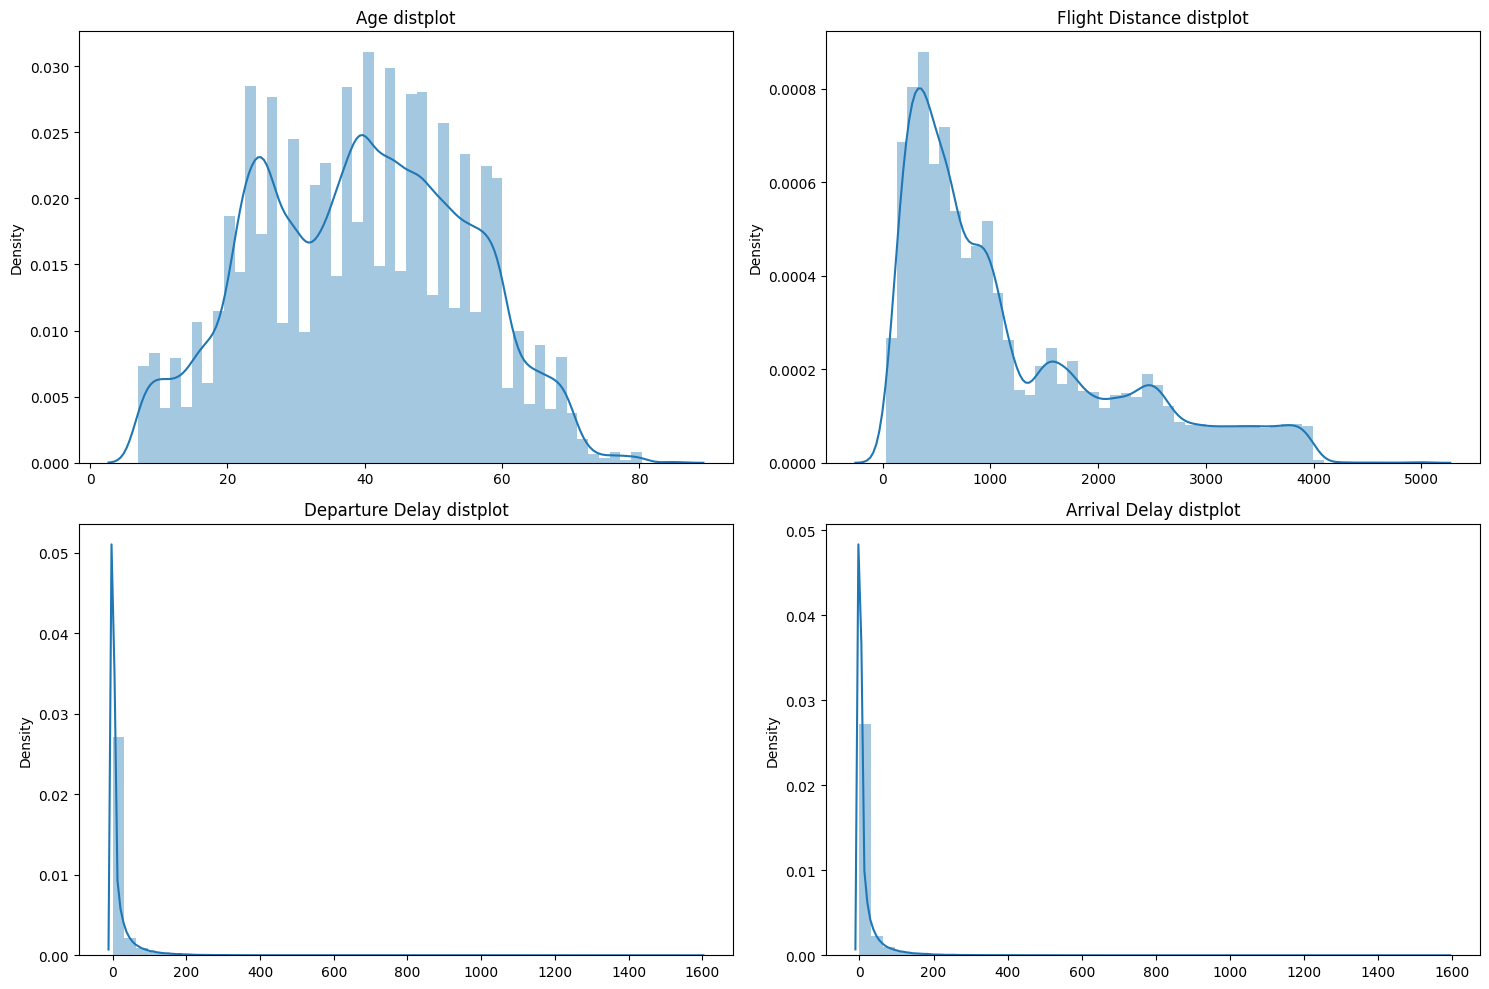

In [77]:
# Distribution of numerical columns

fig,ax = plt.subplots(2,2,figsize=(15,10))
sns.distplot(x = data['Age'],ax = ax[0][0])
ax[0][0].set_title('Age distplot')
sns.distplot(x = data['Flight Distance'],ax = ax[0][1])
ax[0][1].set_title('Flight Distance distplot')
sns.distplot(x = data['Departure Delay'],ax = ax[1][0])
ax[1][0].set_title('Departure Delay distplot')
sns.distplot(x = data['Arrival Delay'],ax = ax[1][1])
ax[1][1].set_title('Arrival Delay distplot')
plt.tight_layout()
plt.show()

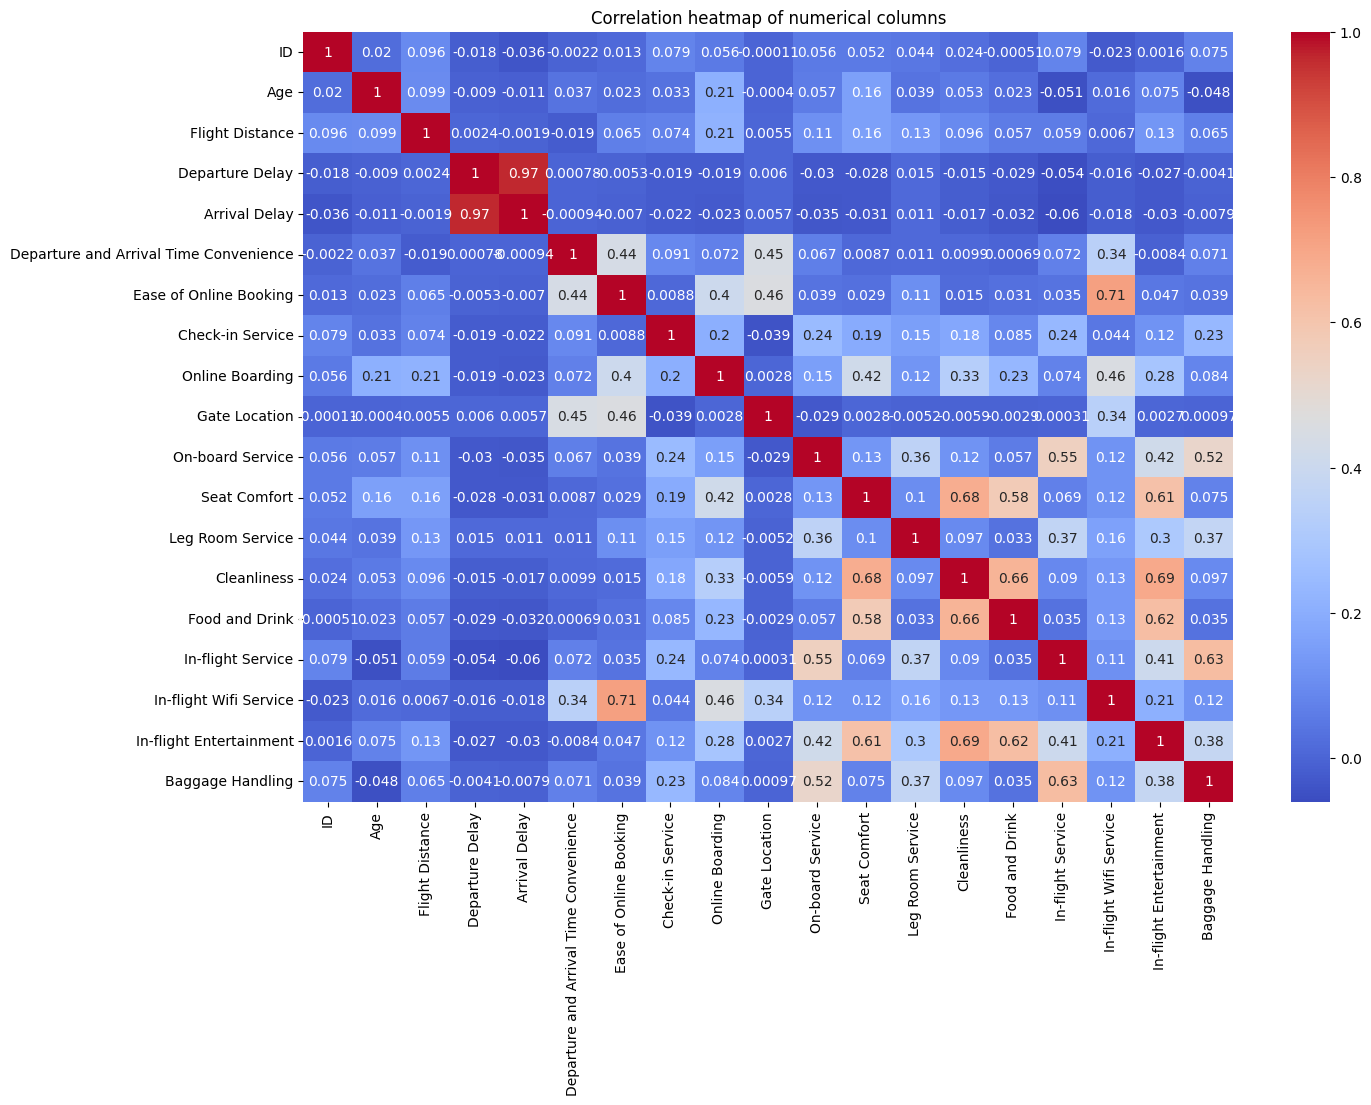

In [83]:
# Correlation between numerical columns

numerical_columns = [col for col in data.columns if data[col].dtypes!='O']

plt.figure(figsize=(15,10))
plt.title('Correlation heatmap of numerical columns')
sns.heatmap(data = data[numerical_columns].corr(),cmap = 'coolwarm',annot = True)
plt.show()

### Data Preprocessing

In [86]:
# Dropping the null values

data.dropna(inplace=True)

In [92]:
# Dropping useless columns

data.drop(columns={'ID'},inplace=True)

In [94]:
# Encoding of Target column

data['Satisfaction'] = data['Satisfaction'].apply(lambda x:1 if x=='Satisfied' else 0)

In [98]:
data.to_csv('cleaned_data.csv')